# A Comparison of Logistic Regression & Decision Tree Classification Using Survey Data 

This dataset came from a survey I did for a market research start up that wanted to know more about gamers who would be excited to try new games if they had elements of NFT's and Cryptocurrency, with the potential to resell their gaming assets on the blockchain.  In this notebook, I aim to explore how a machine learning model could use the survey data to predict whether a gamer is a Web3 Gamer.  I will use logistic regression and Random Forest Classifiers.  At the end of this notebook, I will also use KMeans to create clusters for further analysis.

## Section 1: Set up & Data Prep

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [2]:
#Read in Data
gamers = pd.read_csv(r"C:\Users\cathe\OneDrive\Desktop\Gamers - All Data.csv")

In [3]:
gamers.head()

,Record_ID,Respondent_Status,Start_Time_(UTC),End_Time_(UTC),Elapsed_Time_(hh:mm:ss),ID,Screener_1_1,Screener_1_2,Screener_1_3,Screener_1_4,...,S2_1_r5,S2_1_r6,S2_1_r7,S2_1_r8,Q3_1,Q3_2,Q3_3,Q3_4,Last_Question_Seen,Target?
0,64dfd38367113d70ffe659d3,Complete,8/18/2023 8:24:35 PM,8/18/2023 8:32:38 PM,0:08:03,NaN,"Playing Video Games (computer, console, mobile)",NaN,NaN,NaN,...,Disagree a little bit,Strongly agree,Agree a little bit,Strongly agree,NaN,NaN,NaN,Silver,Complete,Target
1,64dfe3b4d53cacc13b5883ab,Complete,8/18/2023 9:33:40 PM,8/18/2023 9:41:03 PM,0:07:23,1380ca87-efc0-68d7-a47d-feabcf9e6b1f,"Playing Video Games (computer, console, mobile)",NaN,Watching a movie,NaN,...,Strongly disagree,Agree a little bit,Strongly agree,Disagree a little bit,NaN,NaN,NaN,Silver,Complete,Target
2,64dfe3f53f5b006aee0c3a39,Complete,8/18/2023 9:34:45 PM,8/18/2023 9:41:52 PM,0:07:07,e0569d49-95d6-2302-72b3-a97d173450d0,"Playing Video Games (computer, console, mobile)",NaN,Watching a movie,NaN,...,Agree a little bit,Agree a little bit,Disagree a little bit,Strongly agree,NaN,NaN,NaN,Silver,Complete,Target
3,64dfe43e9f7fe7f60ebe1ab6,Complete,8/18/2023 9:35:58 PM,8/18/2023 9:42:16 PM,0:06:18,c13f0b44-67fb-897a-1bbe-3f14914580d9,"Playing Video Games (computer, console, mobile)","Social Media (Instagram, Twitter, Facebook, Ti...",NaN,NaN,...,Strongly agree,Strongly agree,Agree a little bit,Strongly agree,NaN,NaN,NaN,Silver,Complete,Target
4,64dfe47aa02a680ad716ce97,Complete,8/18/2023 9:36:58 PM,8/18/2023 9:45:43 PM,0:08:45,bc36584c-455a-df98-12b6-6c1dec21a1d4,"Playing Video Games (computer, console, mobile)","Social Media (Instagram, Twitter, Facebook, Ti...",Watching a movie,NaN,...,Strongly agree,Disagree a little bit,Strongly disagree,Strongly agree,NaN,NaN,NaN,Silver,Complete,Target


In [4]:
#Remove weird characters
gamers.rename(columns = {'Target?':'Target'}, inplace = True)

Before going any further, the data needs to be Dummy Coded in order to be usable in my analysis.

In [5]:
#Get dummies so I can proceed with the analysis
gender_dm = pd.get_dummies(gamers.Gender, prefix='gender')
age_dm = pd.get_dummies(gamers.Age, prefix='age')
nft_dm = pd.get_dummies(gamers.Q1_r1,prefix='NFT')
crypto_dm = pd.get_dummies(gamers.Q1_r2,prefix='crypto')
hhi_dm = pd.get_dummies(gamers.HHI,prefix='hhi')
emp_dm = pd.get_dummies(gamers.Employment,prefix='emp')
time_dm = pd.get_dummies(gamers.S1_1,prefix='time')
spend_dm = pd.get_dummies(gamers.S1_3,prefix='spend')
pref_dm = pd.get_dummies(gamers.S1_4,prefix='pref')
elements_dm = pd.get_dummies(gamers.S2_1_r1,prefix='elements')
moneyback_dm = pd.get_dummies(gamers.S2_1_r2,prefix='moneyback')
resell_dm = pd.get_dummies(gamers.S2_1_r3,prefix='resell')
crypto2_dm = pd.get_dummies(gamers.S2_1_r4,prefix='crypto2')
distrust_dm = pd.get_dummies(gamers.S2_1_r5,prefix='distrust')
story_dm = pd.get_dummies(gamers.S2_1_r6,prefix='story')
PTW_dm = pd.get_dummies(gamers.S2_1_r8,prefix='ptw')
target_dm= pd.get_dummies(gamers.Target,prefix='target')


In [7]:
gamers_prepped = pd.concat([target_dm,gender_dm, age_dm, nft_dm, crypto_dm, hhi_dm, emp_dm, time_dm, spend_dm, pref_dm, elements_dm, moneyback_dm, resell_dm, crypto2_dm, distrust_dm, story_dm, PTW_dm], axis=1)


In [8]:
gamers_prepped.head()

,target_Non-Target,target_Target,gender_Female,gender_Male,gender_Non-Binary,age_(Answer does not exist),age_17 or younger,age_18 to 34 years old,age_35 to 44 years old,age_45 to 54 years old,...,story_Agree a little bit,story_Disagree a little bit,story_Neither agree nor disagree,story_Strongly agree,story_Strongly disagree,ptw_Agree a little bit,ptw_Disagree a little bit,ptw_Neither agree nor disagree,ptw_Strongly agree,ptw_Strongly disagree
0,0,1,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,1,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
2,0,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,0,1,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0


In [9]:
import math

In [10]:
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats import norm

Next, I want to get an idea of the relationships between the variables by looking at a correlation matrix.  While I could use a Seaborn Heatmap, I prefer to look at the numbers like this because I can click on the column headers and sort to easily absorb the information.

In [11]:
gamers_prepped.corr()

,target_Non-Target,target_Target,gender_Female,gender_Male,gender_Non-Binary,age_(Answer does not exist),age_17 or younger,age_18 to 34 years old,age_35 to 44 years old,age_45 to 54 years old,...,story_Agree a little bit,story_Disagree a little bit,story_Neither agree nor disagree,story_Strongly agree,story_Strongly disagree,ptw_Agree a little bit,ptw_Disagree a little bit,ptw_Neither agree nor disagree,ptw_Strongly agree,ptw_Strongly disagree
target_Non-Target,1.000000,-1.000000,0.049153,-0.028049,-0.090635,-0.052089,0.035805,-0.046008,-0.042002,-0.040515,...,0.051489,-0.022038,0.061952,-9.415652e-02,0.087662,0.025244,-0.037602,-0.069020,0.042395,0.020937
target_Target,-1.000000,1.000000,-0.049153,0.028049,0.090635,0.052089,-0.035805,0.046008,0.042002,0.040515,...,-0.051489,0.022038,-0.061952,9.415652e-02,-0.087662,-0.025244,0.037602,0.069020,-0.042395,-0.020937
gender_Female,0.049153,-0.049153,1.000000,-0.973028,-0.110321,0.072020,-0.114614,0.122952,-0.013448,-0.030314,...,0.021621,-0.000821,0.051533,-4.648076e-02,-0.063402,0.077797,0.051620,0.038916,-0.117282,-0.014391
gender_Male,-0.028049,0.028049,-0.973028,1.000000,-0.121936,-0.070077,0.086817,-0.122088,0.024482,0.040695,...,-0.014948,-0.027888,-0.041913,4.813641e-02,0.065160,-0.063274,-0.042452,-0.080102,0.126716,0.019318
gender_Non-Binary,-0.090635,0.090635,-0.110321,-0.121936,1.000000,-0.007945,0.119089,-0.002997,-0.047619,-0.044901,...,-0.028623,0.123687,-0.041144,-7.406798e-03,-0.007945,-0.062114,-0.039193,0.177675,-0.041338,-0.021315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ptw_Agree a little bit,0.025244,-0.025244,0.077797,-0.063274,-0.062114,-0.035697,0.146480,-0.036611,0.007477,0.029420,...,0.048224,-0.055571,0.026958,-3.327792e-02,-0.035697,1.000000,-0.176090,-0.213947,-0.537964,-0.095767
ptw_Disagree a little bit,-0.037602,0.037602,0.051620,-0.042452,-0.039193,-0.022525,-0.078459,-0.050981,0.082741,0.054554,...,-0.030429,-0.030056,0.077762,2.382245e-17,-0.022525,-0.176090,1.000000,-0.134998,-0.339450,-0.060428
ptw_Neither agree nor disagree,-0.069020,0.069020,0.038916,-0.080102,0.177675,-0.027367,-0.010064,0.007992,-0.088923,0.041338,...,-0.107335,0.149603,0.151624,-6.172332e-02,-0.027367,-0.213947,-0.134998,1.000000,-0.412427,-0.073419
ptw_Strongly agree,0.042395,-0.042395,-0.117282,0.126716,-0.041338,0.066356,-0.031519,0.025031,0.031835,-0.116071,...,0.056441,-0.022955,-0.181356,8.076031e-02,-0.068814,-0.537964,-0.339450,-0.412427,1.000000,-0.184610


Next, I need to prepare an array of the features I wish to consider for my model.  I will drop at least one column from each set of variables in order to avoid any being perfectly correlated with one another (for example, I will not include gender_Female and gender_Male, becuase that would be redundant).

In [12]:
list(gamers_prepped.columns)

['target_Non-Target',
 'target_Target',
 'gender_Female',
 'gender_Male',
 'gender_Non-Binary',
 'age_(Answer does not exist)',
 'age_17 or younger',
 'age_18 to 34 years old',
 'age_35 to 44 years old',
 'age_45 to 54 years old',
 'age_55 or older',
 'NFT_I don’t understand at all',
 'NFT_I fully understand',
 'NFT_I understand somewhat',
 'crypto_I don’t understand at all',
 'crypto_I fully understand',
 'crypto_I understand somewhat',
 'hhi_$25,000 to $50,000',
 'hhi_$50,000 to $100,000',
 'hhi_Less than $25,000',
 'hhi_More than $100,000',
 'emp_Other',
 'emp_Retired',
 'emp_Student',
 'emp_Unemployed',
 'emp_Working full-time',
 'emp_Working part-time',
 'time_1 to 5 hours per week',
 'time_11 or more hours per week',
 'time_6 to 10 hours per week',
 'time_Less than one hour per week',
 'spend_$26 to $50',
 'spend_$51 to 100',
 'spend_Less than $25',
 'spend_More than $100',
 'pref_Buy a physical game (Disc or cartridge)',
 'pref_Free to play',
 'pref_Monthly Subscription',
 'pref

In [13]:
#Set up which features to evaluate for my model
feature_cols_all = ['gender_Female',
                    'gender_Non-Binary',
                    'age_18 to 34 years old',
                    'age_35 to 44 years old',
                    'age_45 to 54 years old',
                    'age_55 or older',
                    'NFT_I fully understand',
                    'crypto_I fully understand',
                    'hhi_More than $100,000',
                    'emp_Working full-time',
                    'time_1 to 5 hours per week',
                    'time_11 or more hours per week',
                    'time_6 to 10 hours per week',
                    'spend_$26 to $50',
                    'spend_$51 to 100',
                    'spend_More than $100',
                    'pref_Free to play',
                    'elements_Strongly agree',
                    'elements_Strongly disagree',
                    'crypto2_Strongly agree',
                    'crypto2_Strongly disagree',
                    'distrust_Strongly agree',
                    'distrust_Strongly disagree',
                    'story_Strongly agree',
                    'story_Strongly disagree',
                    'ptw_Strongly agree',
                    'ptw_Strongly disagree']

In [14]:
X = gamers_prepped[feature_cols_all]
y = gamers_prepped.target_Target

In [15]:
from sklearn.model_selection import train_test_split

# using train test split to cross val
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state =42)

##  Section 2: Exploration & Feature Evaluation

In the next section, I will use Yellowbrick & Sklearn to evaluate features to include in a model that predicts whether respondents are Web3 Gamers or not. 

Here, we use a Random Forest Classifier to evaluate the feature importances. 

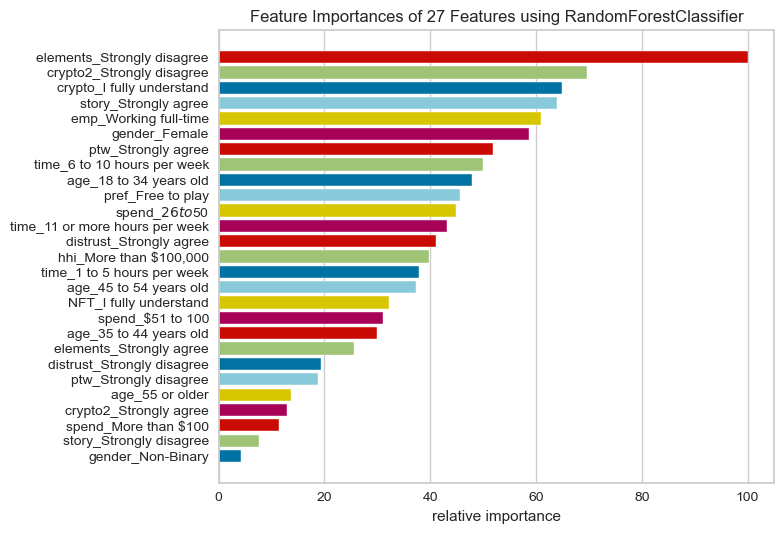

<Axes: title={'center': 'Feature Importances of 27 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [16]:
from sklearn.ensemble import RandomForestClassifier

from yellowbrick.model_selection import FeatureImportances

model = RandomForestClassifier(n_estimators=10)
viz = FeatureImportances(model)
viz.fit(X, y)
viz.show()

The above results show the importance, but not the directionality of the individual variables.  "elements_Strongly disagree" is a variable that means respondents are NOT excited about games with elements of NFT's or cryptocurrency. This is the opposite of a Web3 Gamer.  So it would be helpful to get a sense of the directionality of the relationship between the features and Web3 Gamer membership.  Below, I try an approach using logistic regression.

C:\Users\cathe\anaconda3\lib\site-packages\yellowbrick\model_selection\importances.py:194: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.
  warnings.warn(


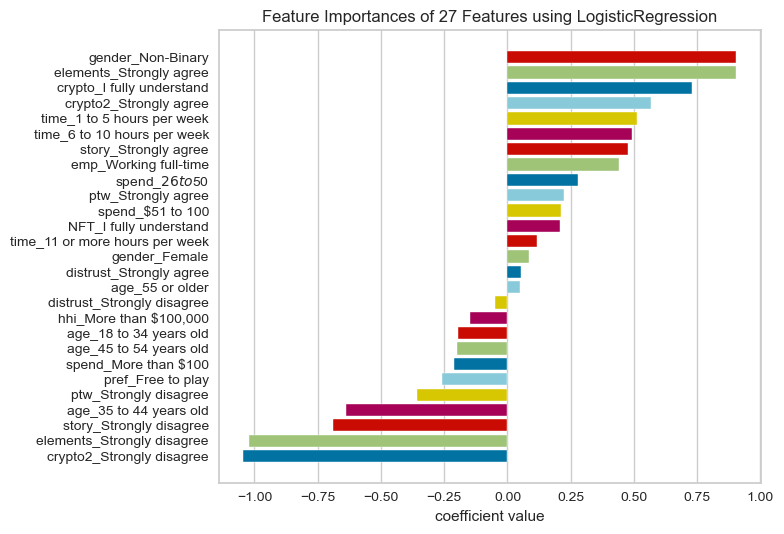

<Axes: title={'center': 'Feature Importances of 27 Features using LogisticRegression'}, xlabel='coefficient value'>

In [17]:
from yellowbrick.model_selection import FeatureImportances
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
viz = FeatureImportances(model, stack=False, relative=False)
viz.fit(X, y)
viz.show()

Some of these features make intuitive sense. We see the directional match of "elements_Strongly agree" with Web3 Gamer membership.  There are also a few variables that are surprising, like 'gender_Non-Binary', which is a very small subset of respondents.

The next step is to figure out the optimal number of variables in the model.  Fortunately, this is easy to do using Recursive Feature Elimination. This starts with all the features and slowly removes the weakest in reverse order of feature importance (above).  Then it evaluates the number of features which was the most precise and provides a score, which is a composite of precision, recall, f1 and support.

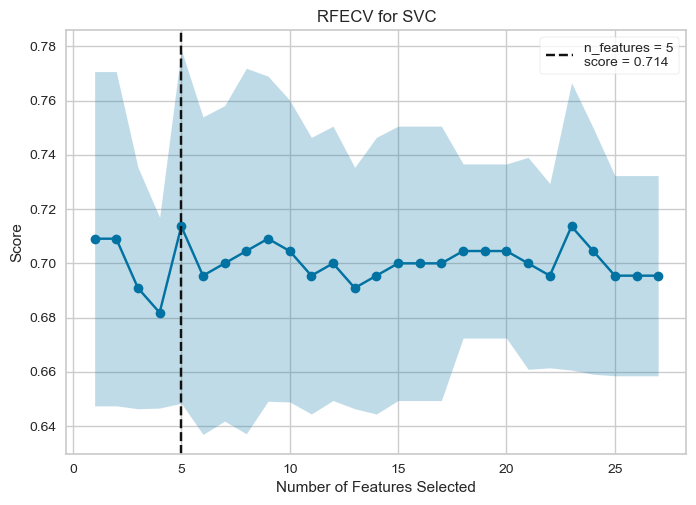

<Axes: title={'center': 'RFECV for SVC'}, xlabel='Number of Features Selected', ylabel='Score'>

In [18]:
from sklearn.svm import SVC
from yellowbrick.model_selection import RFECV
# Instantiate RFECV visualizer with a linear SVM classifier
visualizer = RFECV(SVC(kernel='linear', C=1))

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

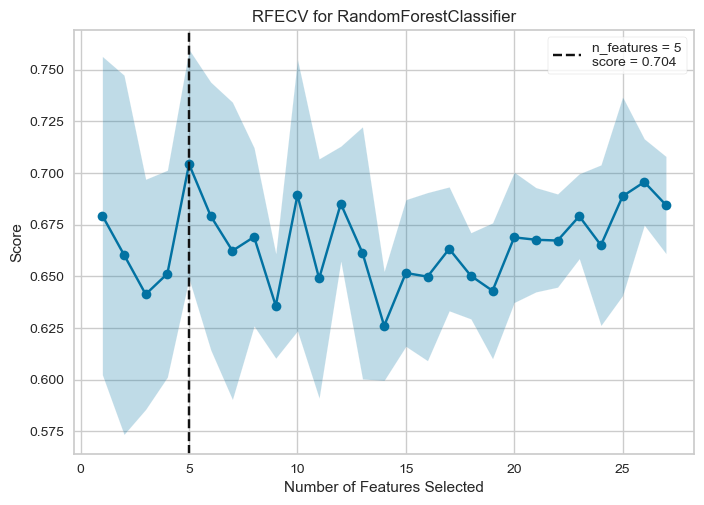

<Axes: title={'center': 'RFECV for RandomForestClassifier'}, xlabel='Number of Features Selected', ylabel='Score'>

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

from yellowbrick.model_selection import RFECV

cv = StratifiedKFold(5)
visualizer = RFECV(RandomForestClassifier(), cv=cv, scoring='f1_weighted')

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

The above methods suggest either a model with 5 or 6 features would be the strongest at predicting Web3 Gamer Membership.  

## Section 3: Running & Testing the Models

Next, I want to run the logistic regression  with the recommended variables and test how well it predicts Web3 Gamer membership.

In [21]:
feature_cols_selected = ['elements_Strongly disagree',
                         'crypto2_Strongly disagree',
                         'crypto_I fully understand',
                         'story_Strongly agree',
                         'emp_Working full-time',
                         'gender_Female']
    
    
    

# no hyper parameters for first model
LogReg1 = LogisticRegression()

# X and y features
X1 = gamers_prepped[feature_cols_selected]
y1 = gamers_prepped.target_Target



# using train test split to cross val
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1,y1, random_state =42)

# fit model
LogReg1.fit(x_train1, y_train1)


LogisticRegression()

In [23]:
name = feature_cols_selected

coef = LogReg1.coef_[0]

pd.DataFrame([name,coef],index = ['Name','Coef']).transpose()

,Name,Coef
0,elements_Strongly disagree,-0.87988
1,crypto2_Strongly disagree,-1.053755
2,crypto_I fully understand,1.111556
3,story_Strongly agree,0.427793
4,emp_Working full-time,0.237189
5,gender_Female,-0.172067


C:\Users\cathe\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


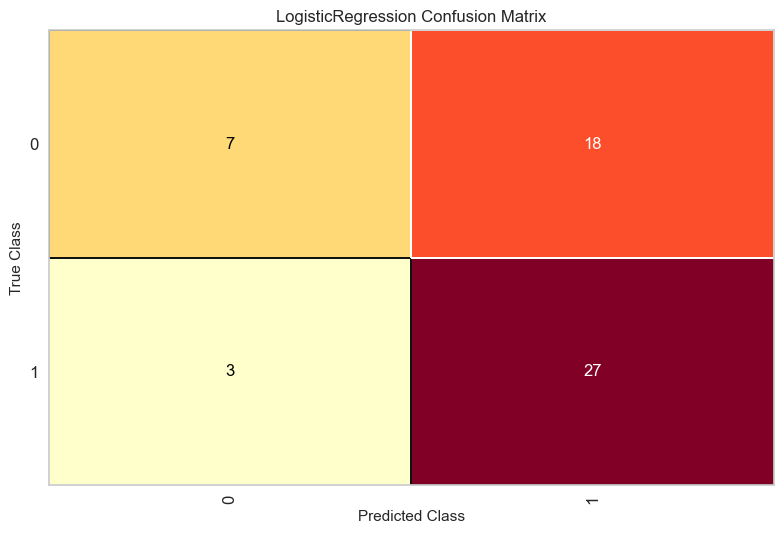

<Axes: title={'center': 'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [29]:
from yellowbrick.classifier import ConfusionMatrix


# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(LogReg1, classes=[0,1])

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(x_train1, y_train1)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(x_test1, y_test1)

# How did we do?
cm.show()

In [33]:
from sklearn import metrics
y_pred1 = LogReg1.predict(x_test1)

metrics.accuracy_score(y_test1,y_pred1)

0.6181818181818182

### This model only has a 61.8% accuracy at predicting Web3 Gamers.  Next, let's see what happens if we do the same thing with a Decision Tree Classifier.

In [46]:
#Fit a classification tree with max_depth=3 on all data.
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

treeclf = DecisionTreeClassifier(random_state=1, max_depth=5)
treeclf.fit(x_train1, y_train1)

DecisionTreeClassifier(max_depth=5, random_state=1)

C:\Users\cathe\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


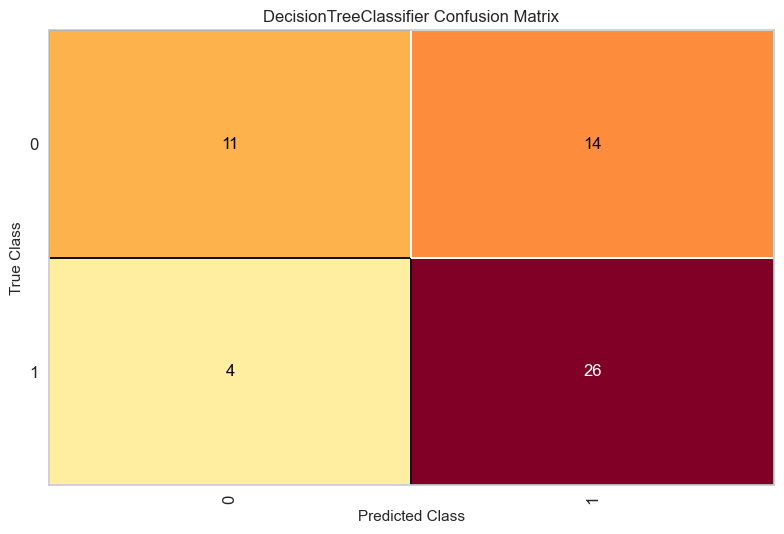

<Axes: title={'center': 'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [47]:
from yellowbrick.classifier import ConfusionMatrix


# The ConfusionMatrix visualizer taxes a model
cm2 = ConfusionMatrix(treeclf, classes=[0,1])

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm2.fit(x_train1, y_train1)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm2.score(x_test1, y_test1)

# How did we do?
cm2.show()

In [48]:
y_pred2 = treeclf.predict(x_test1)

metrics.accuracy_score(y_test1,y_pred2)

0.6727272727272727

With the Decision Tree Classifier, I have a slightly better prediction score or 67% compared to 62% for the Logistic Model.  Below you can see the visualization of the decision tree.  This concludes the exercise.  Perhaps a more accurate predictor could have been developed with additional data, however, the survey was faces time constraints and cost limits which kept the sample size smaller.  

[Text(0.5798611111111112, 0.9166666666666666, 'elements_Strongly disagree <= 0.5\ngini = 0.452\nsamples = 165\nvalue = [57, 108]'),
 Text(0.3333333333333333, 0.75, 'crypto2_Strongly disagree <= 0.5\ngini = 0.392\nsamples = 131\nvalue = [35, 96]'),
 Text(0.2222222222222222, 0.5833333333333334, 'crypto_I fully understand <= 0.5\ngini = 0.36\nsamples = 123\nvalue = [29, 94]'),
 Text(0.1111111111111111, 0.4166666666666667, 'story_Strongly agree <= 0.5\ngini = 0.424\nsamples = 82\nvalue = [25, 57]'),
 Text(0.05555555555555555, 0.25, 'gender_Female <= 0.5\ngini = 0.444\nsamples = 60\nvalue = [20, 40]'),
 Text(0.027777777777777776, 0.08333333333333333, 'gini = 0.397\nsamples = 22\nvalue = [6, 16]'),
 Text(0.08333333333333333, 0.08333333333333333, 'gini = 0.465\nsamples = 38\nvalue = [14, 24]'),
 Text(0.16666666666666666, 0.25, 'emp_Working full-time <= 0.5\ngini = 0.351\nsamples = 22\nvalue = [5, 17]'),
 Text(0.1388888888888889, 0.08333333333333333, 'gini = 0.444\nsamples = 15\nvalue = [5, 10

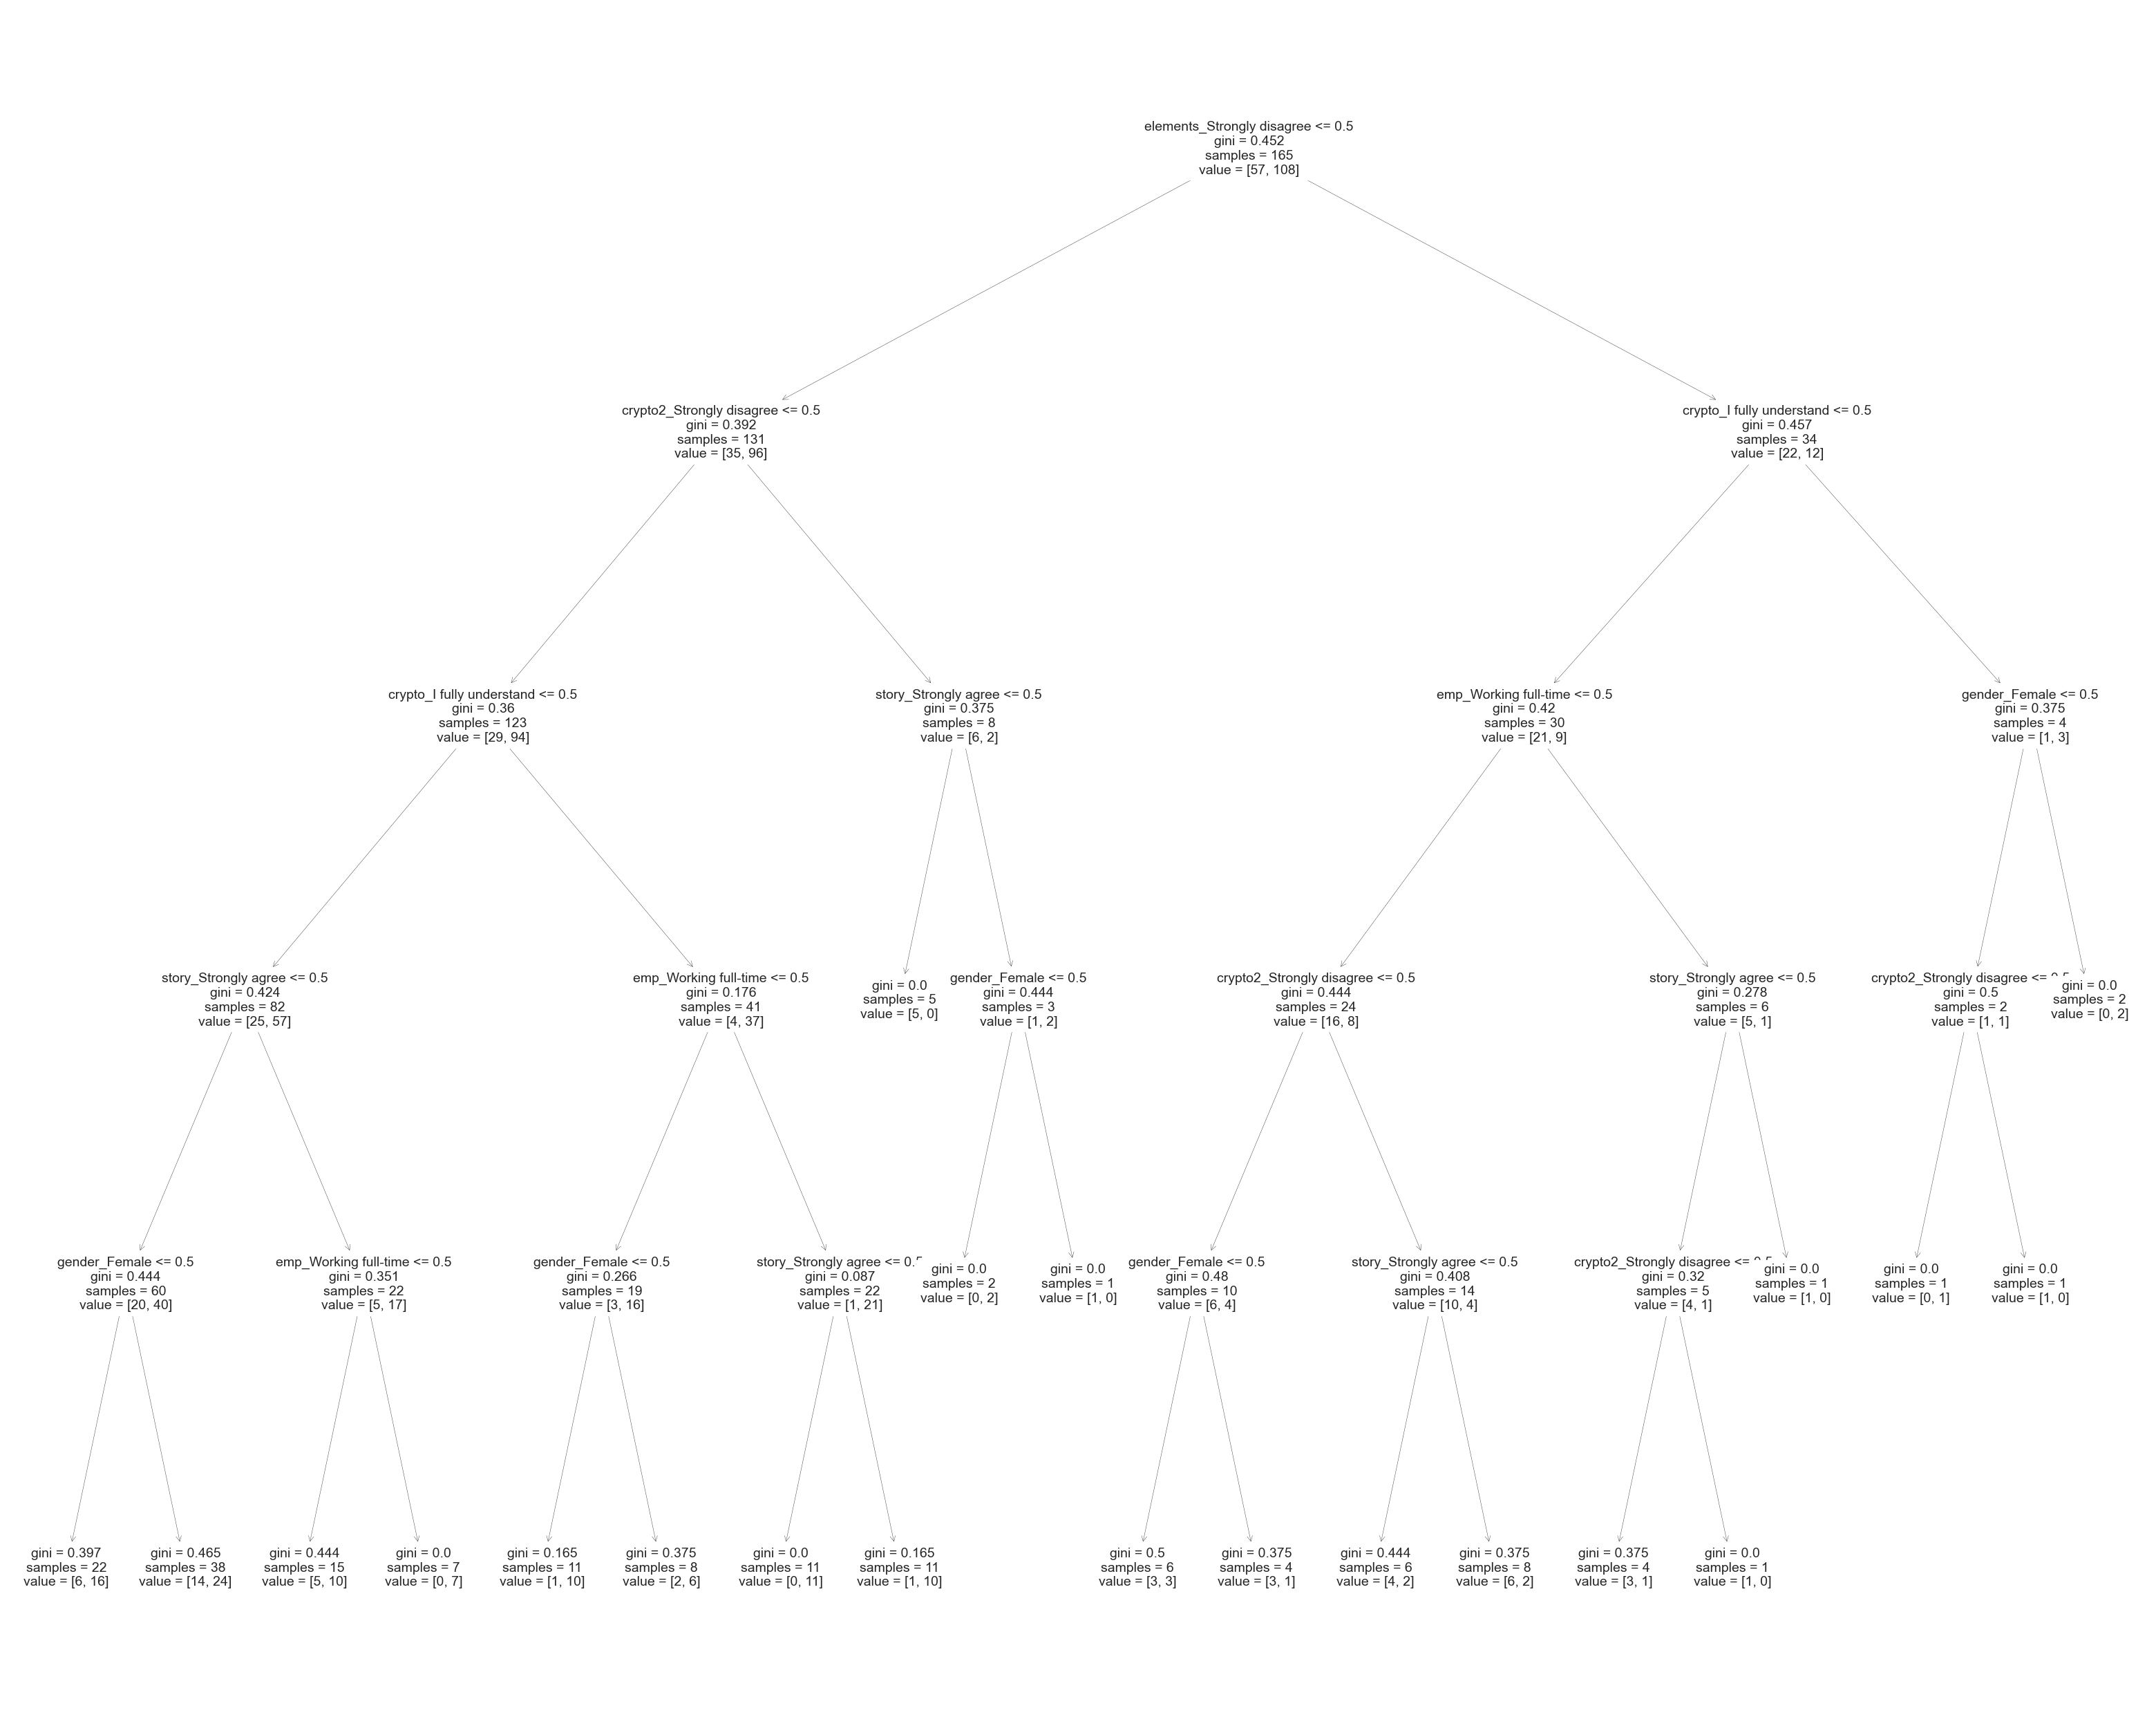

In [76]:
plt.figure(figsize=(40,32))
tree.plot_tree(treeclf, max_depth=5, feature_names=feature_cols_selected, class_names=None, label='all', filled=False, impurity=True, node_ids=False, proportion=False, rounded=False, precision=3, ax=None, fontsize=14)